# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №3: Линейные модели


###### <hr\>
**Общая информация**

**Срок сдачи:** 8 апреля 2019, 06:00  
**Штраф за опоздание:** 
 * -2 балла после 06:00 8 апреля,
 * -4 балла после 06:00 15 апреля,
 * -6 баллов после 06:00 22 апреля,
 * -8 баллов после 06:00 29 апреля.

При отправлении ДЗ указывайте фамилию в названии файла

Используйте данный Ipython Notebook при оформлении домашнего задания.

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext pycodestyle_magic

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



*** Что почитать по теории ***

Одна из лучших книг по ML $-$ "Pattern Recognition and Machine Learning" Bishop, Christopher. 

Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

####  Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

***Ваше решение здесь***

**Здесь и далее**:
* $X_{[n, D+1]}$, $y_{[n,1]}$, $w_{[D+1,1]}, \lambda_{[D+1,D+1]}$
* $\lambda_{0,0} = 0,\ \lambda_{i,i}=\frac{1}{C}, i \neq 0,\ \lambda_{i,j} = 0, i \neq j$
* $\frac{R(w)}{C} = \frac{1}{C}\sum_{j=1}^{D}w_j^2 = w^T \lambda w $

Предсказание линейной модели:
* $ p = Xw_{old} $

**Формула обновления весов**:
$$ w_{new} = w_{old} - \alpha(\frac{1}{n} X^T (p - y) + \lambda w_{old}) $$

#### Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:


$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

***Ваше решение здесь***

Предсказание логистической модели:
* $ p = \frac{1}{1+\exp(-Xw_{old})} $


**Формула обновления весов**:
$$ w_{new} = w_{old} - \alpha(\frac{1}{n} X^T (p - y) + \lambda w_{old}) $$

#### Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией

***Ваше решение здесь***

1. Точное решение линейной регрессии является минимумом:
 
$$ nL(w) =  \left\lVert Xw - y \right\rVert ^ 2 = (Xw - y)^T(Xw - y) $$
  
$$ nL'(w) = ((Xw - y)^T(Xw - y))' = 2X^T(Xw - y) $$
  
$$ \frac{nL''(w)}{2} = X^TX $$

Рассмотрим сингулярное разложение матрицы $X$:
$$ X = U S V^T$$

Матрицы $U$ и $V$ состоят из левых и правых сингулярных векторов, являются унитарными. Матрица $S$ содержит на главное диагонали сингулярные числа, остальные коэффициенты равны 0. Подставим в $X^TX$ унитарное разложение $X$:
$$ X^TX= V S^TS V^T $$

Матрица $S^TS$ -- диагональная матрица, значения которой равны квадратами сингулярных чисел. Т.е. матрица $V$ состоит из собственных векторов матрицы $X^TX$. Если исходная матрица $X$ имела полный ранг, то все диагональные элементы матрицы $S$ ненулевые, и матрица $X^TX$ -- положительно определена.

2. Точное решение для $L(w) =  \frac{\left\lVert Xw - y \right\rVert ^ 2}{n} + w^T \lambda w $:

$$ L'(w) = \frac{2}{n} X^T(Xw - y) + 2 \lambda w = 0 $$

$$w = (X^TX + n\lambda)^{-1}X^Ty $$

#### Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

#### Ваше решение здесь

Если расматривать функцию потерь как зависимость от $x$, то получим следующее:
$$ E'_a(L|x) = -\frac{p'_x(x)}{a'_x(x)} \log \frac{a(x)}{1-a(x)} - \frac{p(x)-a(x)}{a(x)(1-a(x))} $$

Что с этим делать, непонятно...

Если считать, что $p(y_i = 1 | x_i)$ и $a(x)$- это фиксированые значения $p$ и $a$ для $i$-th объекта, а не зависимость от $x$, то:
$$ E'_a(L|x) = -\frac{p-a}{a(1-a)} $$

Минимум достигается при $a=p$.

#  Реализация линейной модели (5 баллов)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [2]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [3]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [4]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


А вот так уже нельзя.

In [5]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [2]:
def batch_generator(X, y, shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """
    num = X.shape[0]
    if shuffle:
        order = np.random.permutation(num)
    else:
        order = np.arange(num)
            
    X_batch = None
    y_batch = None
    for i in range(0, num, batch_size):
        X_batch = X[order[i:i+batch_size]]
        y_batch = y[order[i:i+batch_size]]
        yield (X_batch, y_batch)

# Теперь можно сделать генератор по данным ()
#  my_batch_generator = batch_generator(X, y, shuffle=True, batch_size=1):

In [4]:
#%%pycodestyle


from sklearn.base import BaseEstimator, ClassifierMixin
from numba import jit


# compile magic for higher performance
autojit = jit(nopython=True)


def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """

    return 1 / (1 + np.exp(-x))


def lin_predict(X, w):
    return np.dot(X, w)


def lin_calc_loss(X, y, w, C):
    n = X.shape[0]
    d = y - np.dot(X, w)
    return np.dot(d, d)/n + np.dot(w[1:], w[1:])/C


def lin_calc_loss_grad(X, y, w, C):
    n = X.shape[0]
    g = X.T @ (np.dot(X, w) - y)/n + w/C
    g[0] -= w[0]/C
    return g


def log_predict(X, w):
    return 1 / (1 + np.exp(-np.dot(X, w)))


def log_calc_loss(X, y, w, C):
    n = X.shape[0]
    p = 1/(1 + np.exp(-np.dot(X, w)))
    d = -y * np.log(p) - (1-y)*np.log(1-p)
    return np.sum(d)/n + np.dot(w[1:], w[1:])/C


def log_calc_loss_grad(X, y, w, C):
    n = X.shape[0]
    d = 1/(1 + np.exp(-np.dot(X, w))) - y
    g = (X.T @ d)/n + w/C
    g[0] -= w[0]/C
    return g


def prepend_ones(X):
    n = X.shape[0]
    return np.hstack((np.ones(shape=(n, 1)), X))

In [19]:
#%%pycodestyle


class MySGDClassifier(BaseEstimator, ClassifierMixin):

    def __init__(self, batch_generator=batch_generator,
                 C=1, alpha=0.01, max_epoch=10,
                 model_type='lin_reg', jit=True, batch_size=1,
                 count_loss=True, epoch_loss=True):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        jit - использовать компиляцию для predict, calc_loss, calc_loss_grad
        batch_size - размер батча для итерации обновления весов
        count_loss - подсчет loss'а во время обучения
        epoch_loss - считать loss после завершения эпохи
        """

        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.batch_size = batch_size
        self.errors_log = {'iter': [], 'loss': []}
        self.model_type = model_type
        self.count_loss = count_loss
        self.epoch_loss = epoch_loss

        t = type(batch_size)
        if t is not int:
            raise TypeError(f"batch_size type {t} isn't int")
        if batch_size < 1:
            raise ValueError(f'batch_size {batch_size} must be nonnegative')

        if model_type == 'lin_reg':
            predict = lin_predict
            calc_loss = lin_calc_loss
            calc_loss_grad = lin_calc_loss_grad
        elif model_type == 'log_reg':
            predict = log_predict
            calc_loss = log_calc_loss
            calc_loss_grad = log_calc_loss_grad
        else:
            raise ValueError(f'model type error: {model_type} value incorrect')

        if jit:
            predict = autojit(predict)
            calc_loss = autojit(calc_loss)
            calc_loss_grad = autojit(calc_loss_grad)

        self._predict = predict
        self._calc_loss = calc_loss
        self._calc_loss_grad = calc_loss_grad

    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """

        return self._calc_loss(X_batch, y_batch, self.weights, self.C)

    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь по батчу
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """

        return self._calc_loss_grad(X_batch, y_batch, self.weights, self.C)

    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """

        self.weights = self.weights - self.alpha * new_grad

    def fit(self, X, y):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''

        # Нужно инициализровать случайно веса
        self.weights = np.random.uniform(size=X.shape[1] + 1)
        X = prepend_ones(X)

        for n in range(0, self.max_epoch):
            new_epoch_generator = self.batch_generator(X, y, self.batch_size)
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = new_batch[0]
                y_batch = new_batch[1]
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                if self.count_loss and not self.epoch_loss:
                    batch_loss = self.calc_loss(X_batch, y_batch)
                    self.errors_log['iter'].append(batch_num)
                    self.errors_log['loss'].append(batch_loss)
                self.update_weights(batch_grad)
            if self.count_loss and self.epoch_loss:
                loss = self.calc_loss(X, y)
                self.errors_log['iter'].append(n)
                self.errors_log['loss'].append(loss)

        return self

    def predict(self, X):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''

        # Желательно здесь использовать матричные операции между X и весами
        # например, numpy.dot
        return self._predict(prepend_ones(X), self.weights)


Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [22]:
def get_decision_boundary(clf, borders=None, value=0, num=101):
    '''
    Постраение прямой, на которой w0+x[0]w1+x[1]w2==value
    borders - область, в которой должна проходить прямая
    value - разграничивающее значение
    num - количество точек
    '''

    eps = 1e-5
    if not hasattr(clf, 'weights') or clf.weights.shape[0] < 3:
        return None

    if borders is None:
        borders = np.array([[-1., 1.], [-1., 1.]])
    (xl, xr), (yl, yr) = borders

    w0, w1, w2 = clf.weights[:3]
    w0 -= value
    if -eps < w1 and w1 < eps:
        d = (xr-xl) / (num-1)
        x = np.arange(xl, xr + d/2, d)
        y = -(w0 + w1 * x) / w2
    elif -eps < w2 and w2 < eps:
        d = (yr - yl) / (num-1)
        y = np.arange(yl, yr + d/2, d)
        x = -(w0 + w2 * y) / w1
    else:
        y1 = -(w0 + xl*w1) / w2
        y2 = -(w0 + xr*w1) / w2
        x1 = -(w0 + yl*w2) / w1
        x2 = -(w0 + yr*w2) / w1

        if yl <= y1 and y1 <= yr:
            x1 = xl
        elif x1 < xl-eps or xr < x1+eps:
            return None

        y2 = -(w0 + xr*w1) / w2
        x2 = -(w0 + yr*w2) / w1
        if yl <= y2 and y2 <= yr:
            x2 = xr
        elif x2 < xl-eps or xr < x2+eps:
            return None

        d = (x2-x1) / (num-1)
        x = np.arange(x1, x2 + d/2, d)
        y = -(w0 + x*w1) / w2
    return (x, y)

def plot_decision_boundary(clf, borders=None, value=0, **kwargs):
    '''
    Отрисовка границы.
    borders - область, в которой должна проходить прямая
    value - разграничивающее значение
    kwargs - дополнительные аргументы, передаваемые в вызов plt.plot
    '''

    points = get_decision_boundary(clf, borders, value, 3)
    if points is not None:
        plt.plot(points[0], points[1], **kwargs)

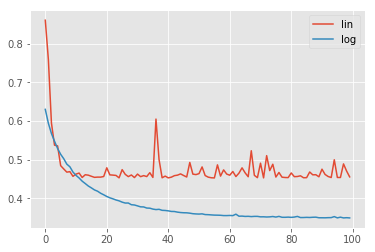

In [20]:
#%%pycodestyle


np.random.seed(0)
N = 200
alpha = 0.003
C = 10
epochs = 100
batch_size = 10

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(N, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(N, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(N), np.zeros(N)]

lin_clf = MySGDClassifier(batch_generator=batch_generator,
                          model_type='lin_reg',
                          alpha=alpha,
                          C=C,
                          max_epoch=epochs,
                          batch_size=batch_size,
                          count_loss=True,
                          epoch_loss=True,
                          jit=True)  # 1.7x speed increase in fit
lin_clf.fit(X, 2*y-1)

log_clf = MySGDClassifier(batch_generator=batch_generator,
                          model_type='log_reg',
                          alpha=alpha,
                          C=C*4,
                          max_epoch=epochs,
                          batch_size=batch_size,
                          count_loss=True,
                          epoch_loss=True,
                          jit=True)  # 2x speed increase in fit
log_clf.fit(X, y)

plt.plot(lin_clf.errors_log['loss'], label='lin')
plt.plot(log_clf.errors_log['loss'], label='log')
plt.legend()

pass

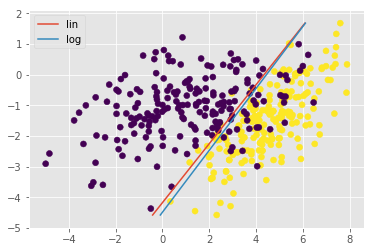

In [23]:
boundary = ((np.min(X[:, 0]), np.max(X[:, 0])),
            (np.min(X[:, 1]), np.max(X[:, 1])))
plot_decision_boundary(lin_clf, boundary, 0, label='lin')
plot_decision_boundary(log_clf, boundary, 0, label='log')

plt.scatter(X[:,0], X[:,1], c=y)
plt.legend()

pass

Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [24]:
from sklearn.datasets import make_classification

In [39]:
# reduced in 10 times
X, y = make_classification(n_samples=10000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

In [40]:
from time import time


def get_avg_loss(clf, X, y, N, agg):
    for i in range(N):
        clf.fit(X, y)
        print('|', end='')
    print('#')
    stat = np.array(clf.errors_log['loss']).reshape(N, -1, agg)
    return stat.mean(axis=2).mean(axis=0)

N = 3
agg = 100
epoch = 10
C = 10
batch_size = 10
alphas = np.logspace(-2, -4, 5)

lin_stat = []
log_stat = []
t = time()
for alpha in alphas:
    lin_clf = MySGDClassifier(batch_generator=batch_generator,
                              batch_size=batch_size,
                              model_type='lin_reg',
                              count_loss=True, epoch_loss=False,
                              alpha=alpha, C=C, max_epoch=epoch)
    lin_stat.append(get_avg_loss(lin_clf, X, 2*y-1, N, agg))
    
    log_clf = MySGDClassifier(batch_generator=batch_generator,
                              batch_size=batch_size,
                              model_type='log_reg',
                              count_loss=True, epoch_loss=False,
                              alpha=alpha, C=C, max_epoch=epoch)
    log_stat.append(get_avg_loss(log_clf, X, y, N, agg))
t = time() - t
print(f'Done in {t:.2f} s')

|||#
|||#
|||#
|||#
|||#
|||#
|||#
|||#
|||#
|||#
Done in 41.62 s


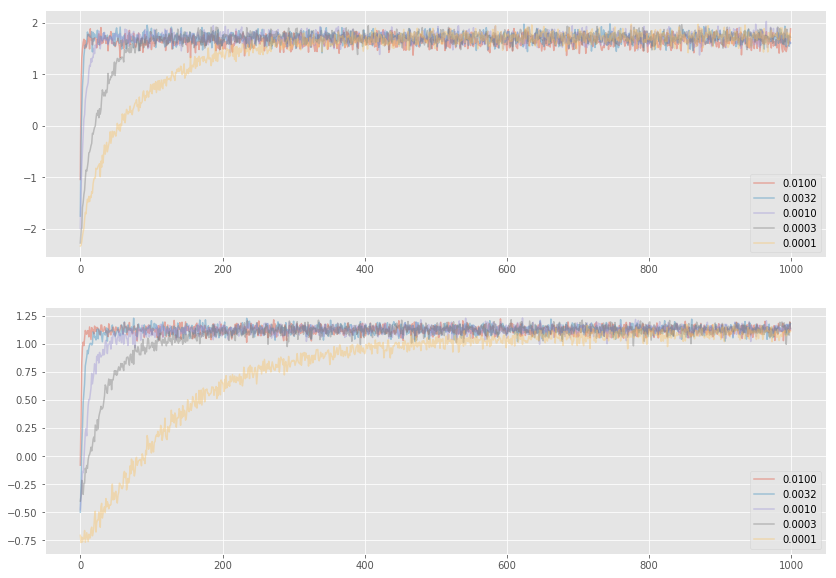

In [41]:
fig = plt.figure(figsize=(14,10))

step=1

fig.add_subplot(211)
for a, stat in zip(alphas[::step], lin_stat[::step]):
    plt.plot(-np.log(stat), label=f'{a:.4f}', alpha=0.4)

plt.legend()

fig.add_subplot(212)
for a, stat in zip(alphas[::step], log_stat[::step]):
    plt.plot(-np.log(stat), label=f'{a:.4f}', alpha=0.4)
plt.legend()

pass

Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

In [16]:
from time import time

def get_avg_weigth(clf, X, y, N):
    stat = []
    for i in range(N):
        clf.fit(X, y)
        stat.append(clf.weights[1:])
    print(end='#')
    return np.average(np.abs(np.array(stat)))

N = 3
epoch = 10
alpha = .0001
C = np.logspace(3, -3, 20)

lin_stat = []
log_stat = []
t = time()
for c in C:
    lin_clf = MySGDClassifier(batch_generator=batch_generator,
                              batch_size=100,
                              model_type='lin_reg',
                              alpha=alpha, C=c, max_epoch=epoch)
    lin_stat.append(get_avg_weigth(lin_clf, X, 2*y-1, N))
    
    log_clf = MySGDClassifier(batch_generator=batch_generator,
                              batch_size=100,
                              model_type='log_reg',
                              alpha=alpha, C=c, max_epoch=epoch)
    log_stat.append(get_avg_weigth(log_clf, X, y, N))
t = time() - t
print()

lin_stat = np.array(lin_stat)
log_stat = np.array(log_stat)
print(f'Done in {t:.2f} s')

########################################
Done in 169.48 s


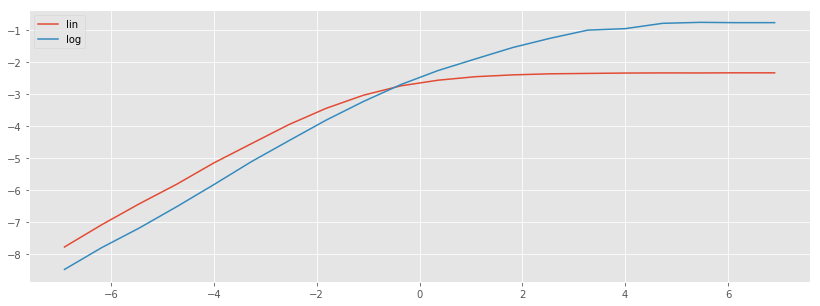

In [17]:
fig = plt.figure(figsize=(14,5))

plt.plot(np.log(C), np.log(lin_stat), label='lin')
plt.plot(np.log(C), np.log(log_stat), label='log')
plt.legend()
p
pass

Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

# Боевое применение (3  балла)

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview-2.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [8]:
doc_to_title = {}
with open('docs_titles.tsv') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print (len(doc_to_title))


28026


In [9]:
import pandas as pd
import numpy as np
import nltk

from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from itertools import product


stemmer = nltk.stem.snowball.RussianStemmer()

def staticvars(**kwargs):
    def decorate(func):
        for k, v in kwargs.items():
            setattr(func, k, v)
        return func
    return decorate


def extract_titledata(filename, default_target=None):
    data = pd.read_csv(filename)
    titledata = {}
    for i in range(len(data)):
        new_doc = data.iloc[i]
        doc_group = new_doc['group_id']
        doc_id = new_doc['doc_id']
        title = set(doc_to_title[doc_id].lower().strip().split())
        title = set(stemmer.stem(s) for s in title)
        if default_target is not None:
            target = default_target
        else:
            target = new_doc['target']
        pair_id = new_doc['pair_id']
        if doc_group not in titledata:
            titledata[doc_group] = []
        titledata[doc_group].append((doc_id, title, target, pair_id))
    return titledata 


@staticvars(a=15, b=8)
def extract_data(titledata):
    y = []
    X = []
    groups = []
    ids = []
    for new_group in titledata:
        docs = titledata[new_group]
        for k, (doc_id, title, target_id, pair_id) in enumerate(docs):
            y.append(target_id)
            groups.append(new_group)
            ids.append(pair_id)
            all_dist = []
            words = set(w for w in title if len(w) > 1)
            #words = title
            wstats = {w:0 for w in words}
            for j in range(0, len(docs)):
                if k == j:
                    continue
                doc_id_j, title_j, target_j, _ = docs[j]
                words_j = title_j
                inter = words.intersection(words_j)
                for w in inter:
                    wstats[w] += 1
                all_dist.append(len(inter))
            a = sorted(all_dist, reverse=True)[0:extract_data.a]
            b = sorted(map(len, words), reverse=True)[:extract_data.b]
            b += [0]*(extract_data.b-len(b))
            X.append(a+b)
    X = np.array(X)
    y = np.array(y)
    groups = np.array(groups)
    ids = np.array(ids)
    return X, y, groups, ids


def cut_X_features(X, a, b):
    l = extract_data.a
    return np.hstack((X[:, :a], X[:, l:l+b]))


def save_results(pair_id, predict, name='submission2.csv'):
    res = pd.DataFrame(data={'pair_id': pair_id, 'target': np.asarray(predict, dtype=int)})
    res = res.set_index('pair_id')
    res.to_csv(name)


def my_split(X, y, groups, test_size=0.1, a=extract_data.a, b=extract_data.b):
    groups_cnt = np.bincount(groups) 
    # gid in [1,n]. so drop 0, then shift to 1 
    order = np.random.permutation(len(groups_cnt)-1) + 1
    cnt = 0
    limit = X.shape[0] * test_size
    mask = np.array([False] * X.shape[0])
    for gid in order:
        mask = mask | (groups == gid)
        cnt += groups_cnt[gid]
        if cnt >= limit:
            break

    X = cut_X_features(X, a, b)

    X_train, y_train = X[mask], y[mask]
    X_test, y_test = X[~mask], y[~mask]
    return X_train, X_test, y_train, y_test


def process_stats(stats, output=True):
    mean, std = stats.mean(), stats.std()
    min, max = stats.min(), stats.max()
    if output:
        print(f'mean {mean:.3f} std {std:.3f} min {min:.3f}')
    return (mean, std, min)


def print_stats(mean, std, min):
    print(f'mean {mean:.3f} std {std:.3f} min {min:.3f}')

In [10]:
traingroups = extract_titledata('train_groups.csv')
X_train, y_train, groups_train, _ = extract_data(traingroups)
print(X_train.shape, y_train.shape, groups_train.shape)

testgroups = extract_titledata('test_groups.csv', 0)
X_test, y_test, groups_test, docs_test = extract_data(testgroups)
print(X_test.shape, y_test.shape, groups_test.shape, docs_test.shape)

scaler = StandardScaler()
X, y = scaler.fit_transform(X_train, y_train), y_train
X_ = scaler.transform(X_test)

(11690, 23) (11690,) (11690,)
(16627, 23) (16627,) (16627,) (16627,)


/usr/local/lib64/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib64/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib64/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [24]:
N = 255
_a = np.array(range(5, 16, 1))
_b = np.array(range(0, 9, 1))

validation = []
t = time()
clf = LinearRegression(fit_intercept=False)
for a, b in product(_a, _b):
    stats = np.zeros(N)
    for i in range(N):
        X1, X2, y1, y2 = my_split(X, 2*y-1, groups_train, 0.2, a, b)
        y3 = 2*(clf.fit(X1, 2*y1-1).predict(X2) > 0)-1
        stats[i] = f1_score(y2, y3)
    validation.append((process_stats(stats, False), (a, b)))
    print(end='|')
print('#')

t = time() - t
print(f'Done in {t:.2f} s')

|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||#
Done in 166.10 s


In [25]:
best = sorted(validation, reverse=True)[:7]

N = 1023
clf = LinearRegression(fit_intercept=False)
for stat, (a, b) in best:
    pref = f'{a:2d} {b:2d}: '
    print(end=pref)
    print_stats(*stat)

    stats = np.zeros(N)
    for i in range(N):
        X1, X2, y1, y2 = my_split(X, 2*y-1, groups_train, 0.2, a, b)
        y3 = 2*(clf.fit(X1, y1).predict(X2) > 0)-1
        stats[i] = f1_score(y2, y3)
    print(end=' '*len(pref))
    process_stats(stats)
    print()

 5  5: mean 0.660 std 0.018 min 0.597
       mean 0.666 std 0.014 min 0.620

 5  8: mean 0.660 std 0.020 min 0.587
       mean 0.666 std 0.015 min 0.593

 5  6: mean 0.660 std 0.018 min 0.594
       mean 0.666 std 0.015 min 0.616

 6  7: mean 0.659 std 0.019 min 0.577
       mean 0.666 std 0.016 min 0.596

 5  4: mean 0.659 std 0.015 min 0.608
       mean 0.663 std 0.015 min 0.596

 5  7: mean 0.659 std 0.021 min 0.562
       mean 0.667 std 0.015 min 0.608

 6  8: mean 0.658 std 0.019 min 0.599
       mean 0.665 std 0.015 min 0.619



In [ ]:
clf = LinearRegression(fit_intercept=False)
_X = np.hstack((X[:, :6], X[:, 15:15+7]))
_X_ = np.hstack((X_[:, :6], X_[:, 15:15+7]))

y7 = clf.fit(_X, y).predict(_X_) > 0
save_results(docs_test, y7, name='submission7.csv')

In [27]:
N = 255 // 2
_a = np.array(range(5, 16, 1))
_b = np.array(range(0, 9, 1))
_c = np.logspace(-2, 0.5, 6)

validation = []
t = time()
for c in _c:
    clf2 = LogisticRegression(fit_intercept=False, solver='lbfgs', max_iter=200, C=c)
    for a, b in product(_a, _b):
        stats = np.zeros(N)
        for i in range(N):
            X1, X2, y1, y2 = my_split(X, y, groups_train, 0.2, a, b)
            y3 = clf2.fit(X1, y1).predict(X2) > 0.5
            stats[i] = f1_score(y2, y3)
        validation.append((process_stats(stats, False), (a, b, c)))
        print(end='|')
    print('#')

t = time() - t
print(f'Done in {t:.2f} s')

|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||#
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||#
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||#
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||#
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||#
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||#
Done in 1813.10 s


In [29]:
best = sorted(validation, reverse=True)[:7]

N = 1023
for stat, (a, b, c) in best:
    pref = f'{c:3.3f} {a:2d} {b:2d}: '
    print(end=pref)
    print_stats(*stat)

    clf = LogisticRegression(fit_intercept=False, solver='lbfgs', max_iter=300, C=c)
    stats = np.zeros(N)
    for i in range(N):
        X1, X2, y1, y2 = my_split(X, y, groups_train, 0.2, a, b)
        y3 = clf.fit(X1, y1).predict(X2) > .5
        stats[i] = f1_score(y2, y3)
    print(end=' '*len(pref))
    process_stats(stats)
    print()

0.032  6  7: mean 0.675 std 0.016 min 0.627
             mean 0.672 std 0.014 min 0.632

0.010  9  8: mean 0.674 std 0.013 min 0.638
             mean 0.672 std 0.014 min 0.624

0.010  8  8: mean 0.673 std 0.014 min 0.627
             mean 0.671 std 0.014 min 0.627

0.032  5  6: mean 0.673 std 0.012 min 0.641
             mean 0.671 std 0.014 min 0.628

0.032  6  6: mean 0.673 std 0.014 min 0.628
             mean 0.670 std 0.014 min 0.616

0.100  6  8: mean 0.672 std 0.014 min 0.631
             mean 0.671 std 0.014 min 0.619

0.010  6  7: mean 0.672 std 0.013 min 0.628
             mean 0.672 std 0.015 min 0.603



In [ ]:
clf = LogisticRegression(fit_intercept=False, solver='lbfgs', max_iter=200, C=0.01)
_X = cut_X_features(X, 6, 7)
_X_ = cut_X_features(X_, 6, 7)

y8 = clf.fit(_X, y).predict(_X_) > .5
save_results(docs_test, y8, name='submission8.csv')

Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

In [33]:
clf = MySGDClassifier(model_type='log_reg',
                      batch_size=100,
                      C=100, alpha=0.001,
                      max_epoch=100)
N = 7
stats = np.zeros(N)
for i in range(N):
    X1, X2, y1, y2 = my_split(X, y, groups_train, 0.2, 6, 7)
    clf.fit(X1, y1)
    y3 = clf.predict(X2) > .5
    stats[i] = f1_score(y2, y3)

process_stats(stats)

clf.fit(cut_X_features(X, 6, 7), y)
y3 = clf.predict(cut_X_features(X_, 6, 7)) > 0
save_results(docs_test, y3, 'submission3.csv')

mean 0.568 std 0.041 min 0.507


С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна. Если да, то Вы молодец!

** Результат с kaggle:**

Посылка submission8.csv имеет public score 0.654

In [11]:
clf = MySGDClassifier(model_type='lin_reg',
                           batch_size=100,
                           C=10, alpha=.003,
                           max_epoch=200)
N = 13
stats = np.zeros(N)
for i in range(N):
    X1, X2, y1, y2 = my_split(X, 2*y-1, groups_train, 0.2, 6, 7)
    y3 = 2*(clf.fit(X1, y1).predict(X2) > 0)-1
    stats[i] = f1_score(y2, y3)
process_stats(stats);

mean 0.534 std 0.100 min 0.232


In [12]:
clf = MySGDClassifier(model_type='log_reg',
                           batch_size=100,
                           C=100, alpha=.01,
                           max_epoch=100)
N = 13
stats = np.zeros(N)
for i in range(N):
    X1, X2, y1, y2 = my_split(X, y, groups_train, 0.2, 6, 7)
    y3 = clf.fit(X1, y1).predict(X2) > .5
    stats[i] = f1_score(y2, y3)
process_stats(stats);

mean 0.571 std 0.061 min 0.435


# Контрольные вопросы
Постарайтесь максимально развернуто и честно ответить на вопросы. Они охватывают тему линейных моделей и скорее нужны преподавателям, чтобы понимать, что именно Вы усвоили плохо. Надеюсь, они подскажут, что именно в теме Вы не понимаете или наоборот порадают, что Вы все знаете ^_^

* Опишите основные, на Ваш взгляд,  отличия логистической регрессии от линейной регрессии. Почему, на ваш взгляд, задачу классификации решают логистической, а не линейной регрессией?

***Ваше ответ здесь***

Функцией предсказания и интервалом результата.

* Как Вы думаете, для каких типов задач (объем данных, число признаков, типы признаков) стоит отдавать предпочтение линейным моделям?

***Ваше ответ здесь***

* Пусть на обучении мы имеем выборку размера $N$, число признаков $D$. Чему равна алгоритмическая сложность одного шага градиентного спуска? Cтохастического градиентного спуска?  Сложность предсказания на одном объекте?

***Ваше ответ здесь***

1. $\theta(ND)$
2. $\theta(nD)$
3. $\theta(D)$

* В чем преимущества стохастического градиентного спуска (в том числе мини-батч) над обычным градиентным спуском? В чем его недостатки? Рассмотрите несколько аспектов $-$ скорость сходимости, необходимость загрузки всех данных в оперативную память, сложность вычисления одного шага.

При использовании стохастического градиентного спуска не требуется хранить всю выборку в памяти, т.к. используется лишь некоторая ее часть. Т.к. сложность вычисления пропорциональна размеру батча, сложность вычисления одного шага меньше, чем для обычного спуска, но при этом направление не всегда направлено в сторону минимума по всей выборке. Но при обработке всей выборки (одна эпоха), в стохастическом методе происходит большее количество обновлений весов, за счет чего происходит более быстрое движение к минимуму.

***Ваше ответ здесь***

* Как Вы думаете, при обучении линейной модели с помощью SGD, ошибку на новом объекте стоит считать до итерации спуска на этом объекте или после? Почему Вы так думаете? Возможно, Вам будет интересно ознакомиться с http://hunch.net/~jl/projects/prediction_bounds/thesis/mathml/thesisse44.xml

***Ваше ответ здесь***

* Как Вы думаете, во времена такого бума нейронных сетей, остаются ли популярными линейные модели, или это уже пережиток прошлого? Почему Вы так думаете?

***Ваше ответ здесь***

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

***Ваше ответ здесь***

Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

*** ВАШ ОТЗЫВ ЗДЕСЬ***